<a href="https://colab.research.google.com/github/jaylin0418/2025-IM-Camp/blob/main/intro_AI_kmeans_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 人工智慧導論 - K-means clustering 實作（非監督式學習）

In [6]:
!pip install sklearn
!pip install matplotlib
!pip install numpy

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


### 1. 載入手寫數字數據集

我們將使用 ```sklearn``` 提供的手寫數字數據集，這個數據集包含 1797 張手寫的數字圖片，每張圖片是 8x8 的大小，經過展平後變成 64 維的向量。

In [7]:
from sklearn.datasets import load_digits

# 下載手寫數字數據集
digits = load_digits()

# 數字圖片的數據
data = digits.data  # (1797, 64)，每個數字是一個 8x8 的圖像展平為 64 維
print(data.shape)

# 真實的數字標籤 (0-9)
labels = digits.target

(1797, 64)


這段程式碼會將數據集中的圖片數據 (data) 和對應的標籤 (labels) 分別存儲在 `data` 和 `labels` 變數中。

### 2. 使用 K-means 分群演算法

K-means 是一種常見的非監督式學習演算法，用來將資料點分成多個群（cluster）。這裡將數字數據分成 10 群，因為我們有 10 個數字（0-9）。

In [8]:
from sklearn.cluster import KMeans

# 使用 K-means 分群，將資料分為 10 顆群
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans.fit(data)

# 得到每個資料點的分群結果
cluster_labels = kmeans.labels_

`KMeans` 會將數據分成 10 顆群，並且將每個資料點對應到一個群標籤。這些標籤會保存在 `cluster_labels` 中。

### 3. 視覺化分群結果

接下來，我們將視覺化一些隨機選擇的數字圖片，並且展示它們的 K-means 分群結果和真實標籤。

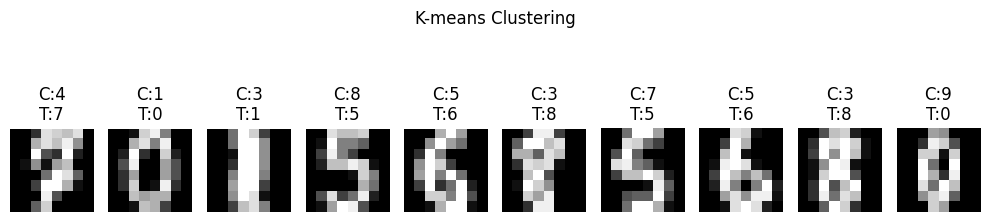

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 用來顯示數字圖片的函數
def plot_digits(data, cluster_labels, true_labels, title):
    fig, axes = plt.subplots(1, 10, figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.set_axis_off()  # 關閉坐標軸
        ax.imshow(data[i].reshape(8, 8), cmap='gray')  # 顯示圖片
        ax.set_title(f"C:{cluster_labels[i]}\nT:{true_labels[i]}")  # 顯示分群結果和真實標籤
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# 隨機選擇 10 個數字，顯示其分群結果
rng = np.random.default_rng()
indices = rng.choice(len(data), size=20, replace=False)
plot_digits(data[indices], cluster_labels[indices], labels[indices], "K-means Clustering")

這段程式碼會隨機選擇 10 個數字圖片，並將每張圖片的 K-means 分群結果 (`C`) 和真實標籤 (`T`) 顯示在標題中。

### 4. 計算分群的準確度

由於 K-means 是非監督式學習，我們無法直接知道分群的結果是否和真實標籤一致（例如：群編號為`5`不代表這個影像所分到的真實數字類別是`5`）。因此，我們需要透過比較每個分群的標籤和真實標籤，計算 K-means 分群結果的準確度。

In [10]:
from sklearn.metrics import accuracy_score
from scipy.optimize import linear_sum_assignment

# 計算分群準確度
def calculate_accuracy(true_labels, cluster_labels):
    num_classes = len(np.unique(true_labels))
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

    # 建立 confusion matrix
    for true, cluster in zip(true_labels, cluster_labels):
        confusion_matrix[true, cluster] += 1

    # 使用匈牙利算法找到最佳配對
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)  # 最大化配對
    matching = dict(zip(col_ind, row_ind))

    # 重新映射分群標籤
    remapped_labels = np.array([matching[label] for label in cluster_labels])

    # 計算 accuracy
    return accuracy_score(true_labels, remapped_labels)

# 計算 K-means 的準確度
accuracy = calculate_accuracy(labels, cluster_labels)
print(f"K-means 分群準確率: {accuracy * 100:.2f}%")

K-means 分群準確率: 79.35%


這段程式碼會計算分群的準確度，並輸出結果。由於 K-means 的分群標籤不一定和真實標籤一致，我們需要使用匈牙利算法來尋找最佳的配對方式。